## Greenhouse Gas Overview:

[Data Source](https://www.esrl.noaa.gov/gmd/dv/data/?site=mlo) - NOAA ESRL Moanalua Datasets
[Data Reference](https://ourworldindata.org/greenhouse-gas-emissions) - Our World in Data

##### GWP Factors:
A GWP is a means of equating other gasses to CO<sub>2</sub>. This means all gasses can be converted into a CO<sub>2</sub>
equivalent.

GWP Conversion (CO<sub>2</sub>eq) = mass (kg) * gwp factor

GWP is the measure of 'strength' pf a greenhouse gas averaged over a chosen time horizon. For example, GWP<sub>100</sub> is the global warming potential over a 100-year timescale.

| ______________________ | CO<sub>2</sub> | CH<sub>4</sub>      | N<sub>2</sub>O        | SF<sub>6</sub> |
| ---------------------- | -------------- | ------------------- | --------------------- | -------------- |
| Life-time (years)      | *              | 12.4                | 121.0                 | 3200.0         |
| GWP Factor (100-years) | 1              | 28 (34<sub>1</sub>) | 265 (298<sub>1</sub>) | 23500          |
| GWP Factor (20-years)  | 1              | 84 (86<sub>1</sub>) | 264 (268<sub>1</sub>) | 17500          |
| GTP Factor (100-years) | 1              | 4  (11<sub>1</sub>)  | 234 (297<sub>1</sub>) | 28200          |
| GTP Factor (20-years)  | 1              | 67 (70<sub>1</sub>) | 277 (284<sub>1</sub>) | 180900         |

<sub>1 - GWP factor with climate feedback loops.</sub>

<sub>* - unspecified lifetime.</sub>

<sub>Table 1 - Derived from AR5 [1]</sub>

With the given equation, the GWP of CH<sub>4</sub> equates to 1 kg CH<sub>4</sub> being 28 times more effective at warming
than CO<sub>2</sub> over a 100-year period. A period of 20 years may be used to indicate a better representation of short-term warming. The given equation can also be used to equate parts per million to a CO<sub>2</sub> equivalent.

GWP does not account for the lifespan of a given gas. This may lead to some inaccuracies. The diminishing returns of each gas may be considered, but GWP does not encapsulate that information.

GTP is an alternative metric that measures the change in temperature after the time period. GTP is a lot harder to calculate, and requires modeling of climate system responses to changing concentrations of greenhouse gases.

**GWP IS BY NO MEANS A PERFECT REPRESENTATION OF WARMING**

Numbers presented by this research are subject to change as well as future revision and research by governing bodies such as the IPCC.

---
#### GWP/GTP Table in JSON Format:

In [1]:
gwp_gtp_table = {
    "gwp100": {
        "CO2": {0: 1, 1: 1},
        "CH4": {0: 28, 1: 34},
        "N2O": {0: 265, 1: 298},
        "SF6": {0: 23500, 1: 23500}
    },
    "gwp20": {
        "CO2": {0: 1, 1: 1},
        "CH4": {0: 84, 1: 86},
        "N2O": {0: 264, 1: 268},
        "SF6": {0: 17500, 1: 17500}
    },
    "gtp100": {
        "CO2": {0: 1, 1: 1},
        "CH4": {0: 4, 1: 11},
        "N2O": {0: 234, 1: 297},
        "SF6": {0: 28200, 1: 28200}
    },
    "gtp20": {
        "CO2": {0: 1, 1: 1},
        "CH4": {0: 67, 1: 70},
        "N2O": {0: 277, 1: 284},
        "SF6": {0: 180900, 1: 180900}
    }
}
gwp100_no_feedback = [gwp_gtp_table['gwp100']['CO2'][0], gwp_gtp_table['gwp100']['CH4'][0],
                      gwp_gtp_table['gwp100']['N2O'][0], gwp_gtp_table['gwp100']['SF6'][0]]
gwp100_feedback = [gwp_gtp_table['gwp100']['CO2'][1], gwp_gtp_table['gwp100']['CH4'][1],
                   gwp_gtp_table['gwp100']['N2O'][1], gwp_gtp_table['gwp100']['SF6'][1]]
gwp20_no_feedback = [gwp_gtp_table['gwp20']['CO2'][0], gwp_gtp_table['gwp20']['CH4'][0],
                     gwp_gtp_table['gwp20']['N2O'][0], gwp_gtp_table['gwp20']['SF6'][0]]
gwp20_feedback = [gwp_gtp_table['gwp20']['CO2'][1], gwp_gtp_table['gwp20']['CH4'][1],
                  gwp_gtp_table['gwp20']['N2O'][1], gwp_gtp_table['gwp20']['SF6'][1]]

gtp100_no_feedback = [gwp_gtp_table['gtp100']['CO2'][0], gwp_gtp_table['gtp100']['CH4'][0],
                      gwp_gtp_table['gtp100']['N2O'][0], gwp_gtp_table['gtp100']['SF6'][0]]
gtp100_feedback = [gwp_gtp_table['gtp100']['CO2'][1], gwp_gtp_table['gtp100']['CH4'][1],
                   gwp_gtp_table['gtp100']['N2O'][1], gwp_gtp_table['gtp100']['SF6'][1]]
gtp20_no_feedback = [gwp_gtp_table['gtp20']['CO2'][0], gwp_gtp_table['gtp20']['CH4'][0],
                     gwp_gtp_table['gtp20']['N2O'][0], gwp_gtp_table['gtp20']['SF6'][0]]
gtp20_feedback = [gwp_gtp_table['gtp20']['CO2'][1], gwp_gtp_table['gtp20']['CH4'][1],
                  gwp_gtp_table['gtp20']['N2O'][1], gwp_gtp_table['gtp20']['SF6'][1]]

---
## Data Overview - Data Engineering

*(To first expolore the data in use, a few libraries are needed in order to provide greater analysis on the data.)*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

---

### Data Insights:

<p>The mlo_full.csv dataset that is beign used is a synthesized dataset consiting of multiple different NOAA Moanalua datasets. Instead of loading in multiple different datasets, all of the necessary datasets have been stiched together into one dataset for ease of access. This dataset consists of monthly mean CO<sub>2</sub> [d1], monthly mean CH<sub>4</sub> [d2], monthly mean N<sub>2</sub>O [d3], and monthly mean SF<sub>6</sub> [d4] along with meteorlogical data [d5] gathered by NOAA Moanalua Labratories.</p>

Each of thhe atmospheric molecular datasets are flask samples from NOAA Moanalua Labratories. Each dataset does not date back to the same time, but they all have the same datafields of site, year, month, and value. Little manipulation has been made to these datasets in order to stitch them together. The only change made was renaming the value column for each respective molecule to 'mean_`molecule`'. CO<sub>2</sub> is measured in ppm, CH<sub>4</sub> and N<sub>2</sub>O are measured in ppb, and SF<sub>6</sub> is measured in ppt [d1, d2, d3, d4]. Check the dataset README's for more information about the data.

The meterological datasets required some manipulation in order to be stiched in with the atmospheric datasets. All of the metereological data was presented in hourly averages so an mean of those averages was taken for each month to unify the time scale with the atmospheric data time scale.

---
The following are scripts used to create the dataset:
```Python
def join_met_datasets():
    """
    A small script that takes all of the individual hourly datasets and combines them into one dataset.

    WARNING: These small scripts are just for one time uses to generate the datasets that this project
    ultimately uses. These scripts should not be called unless the data needs to be manually regenerated.

    An additional warning for this particular script is that it takes a long time to run and combline all of
    the datasets into one.

    READ THE README IN data/datasets/noaa_mlo/met FOR MORE INFORMATION ON THE NATURE OF THIS DATA.
    """
    rel_path = 'data/datasets/noaa_mlo/met'
    features = ['site', 'year', 'month', 'day', 'hour', 'wind_direction', 'wind_speed', 'wind_steadiness', 'pressure',
                'temp2m', 'temp10m', 'temp_tower', 'rel_humidity', 'precipitation_intensity']
    mlo_met_datasets = [file for file in os.listdir(rel_path) if file.endswith('.txt')]

    df = pd.DataFrame(columns=features)
    i = 0
    for dataset in mlo_met_datasets:
        with open(os.path.join(rel_path, dataset)) as fp:
            for a in [line.split() for line in fp.read().split('\n')]:
                print(a)
                if len(a) == len(features):
                    df.loc[i] = a
                    i += 1
    df.to_csv(os.path.join(rel_path, 'mlo_ytd_hourly.csv'), index=False)


def create_monthly_met_mean_dataset():
    """
    A small script that takes all of the hourly data and turns it into a monthly mean dataset.
    The mean of all averages are taken for every month of each year in the dataset and appended
    to the overall dataset of monthly mean meteorological data.

    WARNING: These small scripts are just for one time uses to generate the datasets that this project
    ultimately uses. These scripts should not be called unless the data needs to be manually regenerated.

    READ THE README IN data/datasets/noaa_mlo/met FOR MORE INFORMATION ON THE NATURE OF THIS DATA.
    """
    rel_path = 'data/datasets/noaa_mlo/met'
    features = ['site', 'year', 'month', 'wind_direction', 'wind_speed', 'wind_steadiness', 'pressure',
                 'temp2m', 'temp10m', 'temp_tower', 'rel_humidity', 'precipitation_intensity']
    df = pd.read_csv(os.path.join(rel_path, 'mlo_ytd_hourly.csv'), na_values=[-999.9, -99])

    mo_mean_dataset = pd.DataFrame(columns=features)
    for year in range(1977, 2021):
        for month in range(1, 13):
            mo: pd.DataFrame = df.loc[df['year'] == year].loc[df['month'] == month]
            mo_mean: pd.DataFrame = mo[['wind_direction', 'wind_speed', 'wind_steadiness', 'pressure', 'temp2m', 'temp10m', 'temp_tower', 'rel_humidity', 'precipitation_intensity']].mean()
            t = pd.DataFrame(columns=features)
            t = t.append(mo_mean, ignore_index=True)
            t['site'] = 'MLO'
            t['year'] = year
            t['month'] = month
            mo_mean_dataset = mo_mean_dataset.append(t, ignore_index=True)
    mo_mean_dataset.to_csv(os.path.join(rel_path, 'mlo_ytd_meanavg.csv'), index=False)


def create_flask_dataset():
    """
    Combines all of the monthly flask datasets into one dataset.

    WARNING: These small scripts are just for one time uses to generate the datasets that this project
    ultimately uses. These scripts should not be called unless the data needs to be manually regenerated.

    READ THE READMEs IN data/datasets/noaa_mlo/ccg/flasks FOR MORE INFORMATION ON THE NATURE OF THIS DATA.
    """
    rel_path = 'data/datasets/noaa_mlo/ccgg/flasks'
    co2_dataset = 'co2_mlo_surface-flask_1_ccgg_month.txt'
    ch4_dataset = 'ch4_mlo_surface-flask_1_ccgg_month.txt'
    n2o_dataset = 'n2o_mlo_surface-flask_1_ccgg_month.txt'
    sf6_dataset = 'sf6_mlo_surface-flask_1_ccgg_month.txt'
    individual_features = ['site', 'year', 'month', 'value']
    co2_df = pd.read_csv(os.path.join(rel_path, co2_dataset), skiprows=70, names=individual_features, sep='\s+')
    ch4_df = pd.read_csv(os.path.join(rel_path, ch4_dataset), skiprows=70, names=individual_features, sep='\s+')
    n2o_df = pd.read_csv(os.path.join(rel_path, n2o_dataset), skiprows=70, names=individual_features, sep='\s+')
    sf6_df = pd.read_csv(os.path.join(rel_path, sf6_dataset), skiprows=70, names=individual_features, sep='\s+')
    co2_df.rename({'value': 'co2_mean'}, axis=1, inplace=True)
    ch4_df.rename({'value': 'ch4_mean'}, axis=1, inplace=True)
    n2o_df.rename({'value': 'n2o_mean'}, axis=1, inplace=True)
    sf6_df.rename({'value': 'sf6_mean'}, axis=1, inplace=True)
    atmosphere_df = pd.merge(pd.merge(pd.merge(co2_df, ch4_df, how='outer'), n2o_df, how='outer'), sf6_df, how='outer')
    atmosphere_df.to_csv(os.path.join(rel_path, 'mlo_atmospheric_flask_monthly_means.csv'), index=False)


def create_full_dataset():
    rel_path = 'data/datasets/noaa_mlo'
    atm_rel_path = 'data/datasets/noaa_mlo/ccgg/flasks'
    atmosphere_df = pd.read_csv(os.path.join(atm_rel_path, 'mlo_atmospheric_flask_monthly_means.csv'))
    met_rel_path = 'data/datasets/noaa_mlo/met'
    meterological_df = pd.read_csv(os.path.join(met_rel_path, 'mlo_ytd_meanavg.csv'))
    mlo_full_df = pd.merge(atmosphere_df, meterological_df, how='outer')
    mlo_full_df.to_csv(os.path.join(rel_path, 'mlo_full.csv'), index=False)
```
---
A more in depth overview of the data can be found in the README folder for each of the datasets' READMEs.
        
#### A Look Inside the Data:

The first step is to take a look at the data to get a sense of what the data looks like.
A first observation is that there are many missing datapoints very early on in the dataset as well as at the end of the dataset. Missing datapoints will be addressed later on.


In [3]:
mlo_df = pd.read_csv('data/datasets/noaa_mlo/mlo_full.csv')
mlo_df

,site,year,month,co2_mean,ch4_mean,n2o_mean,sf6_mean,wind_direction,wind_speed,wind_steadiness,pressure,temp2m,temp10m,temp_tower,rel_humidity,precipitation_intensity
0,MLO,1969,8,322.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLO,1969,9,321.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MLO,1969,10,320.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLO,1969,11,321.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLO,1969,12,323.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,MLO,2020,8,NaN,NaN,NaN,NaN,144.698925,5.538844,95.385753,681.301640,9.547984,9.708199,9.364919,35.154583,0.036290
547,MLO,2020,9,NaN,NaN,NaN,NaN,147.730556,4.146528,94.533333,681.233972,8.980139,9.550278,9.392083,35.596774,0.041667
548,MLO,2020,10,NaN,NaN,NaN,NaN,176.219086,4.475269,93.590054,680.231976,8.025806,8.724462,8.632930,43.420680,0.048387
549,MLO,2020,11,NaN,NaN,NaN,NaN,165.845722,5.234642,92.608333,681.288292,6.697639,7.428889,7.302361,46.822511,0.043056


---

Next, all of the data points are plotted versus time to see how the data plays out over time. But first, to make working with a time axis easier, the year and month columns are combined into one column. This is done by converting the index of the data to a pandas DateTime index. Since the data points are monthly observations, it should not matter that the index is the first day of each month.


In [4]:
plot_size = (15, 10)
mlo_df.index = pd.to_datetime(mlo_df[['year', 'month']].assign(day=1))
mlo_df

,site,year,month,co2_mean,ch4_mean,n2o_mean,sf6_mean,wind_direction,wind_speed,wind_steadiness,pressure,temp2m,temp10m,temp_tower,rel_humidity,precipitation_intensity
1969-08-01,MLO,1969,8,322.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-09-01,MLO,1969,9,321.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-10-01,MLO,1969,10,320.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-11-01,MLO,1969,11,321.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969-12-01,MLO,1969,12,323.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,MLO,2020,8,NaN,NaN,NaN,NaN,144.698925,5.538844,95.385753,681.301640,9.547984,9.708199,9.364919,35.154583,0.036290
2020-09-01,MLO,2020,9,NaN,NaN,NaN,NaN,147.730556,4.146528,94.533333,681.233972,8.980139,9.550278,9.392083,35.596774,0.041667
2020-10-01,MLO,2020,10,NaN,NaN,NaN,NaN,176.219086,4.475269,93.590054,680.231976,8.025806,8.724462,8.632930,43.420680,0.048387
2020-11-01,MLO,2020,11,NaN,NaN,NaN,NaN,165.845722,5.234642,92.608333,681.288292,6.697639,7.428889,7.302361,46.822511,0.043056


Text(0, 0.5, 'Monthly Mean CO2 (ppm)')

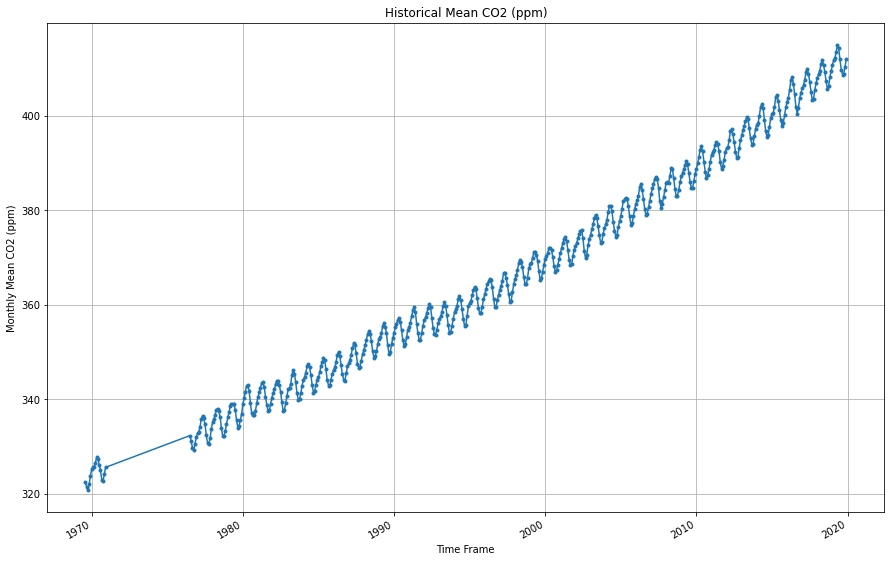

In [5]:
plot = mlo_df['co2_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean CO2 (ppm)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean CO2 (ppm)')

Text(0, 0.5, 'Monthly Mean CH4 (ppb)')

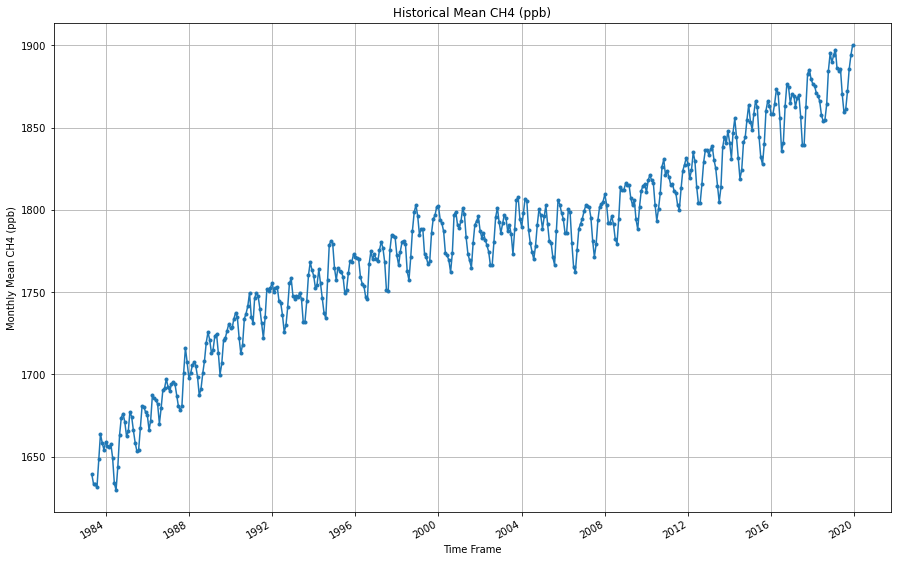

In [6]:
plot = mlo_df['ch4_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean CH4 (ppb)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean CH4 (ppb)')

Text(0, 0.5, 'Monthly Mean N2O (ppb)')

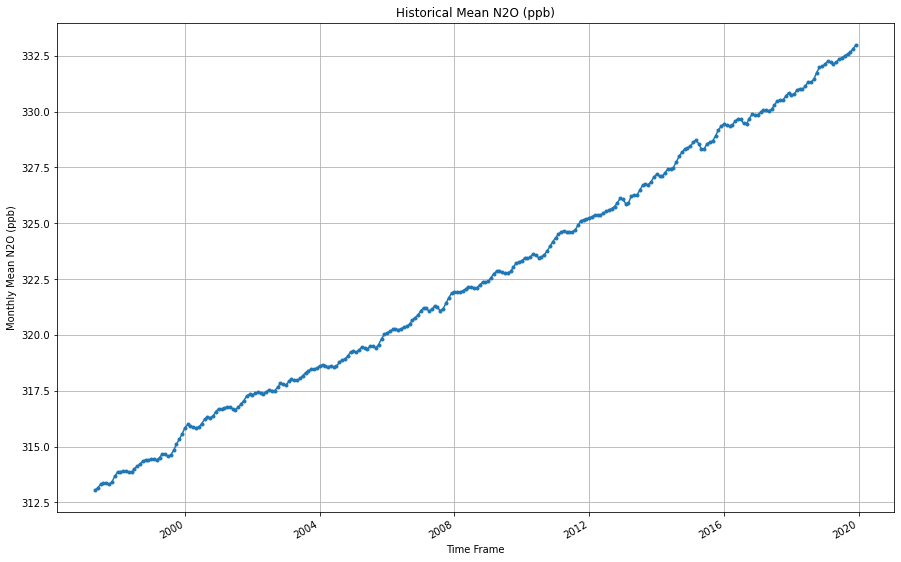

In [7]:
plot = mlo_df['n2o_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean N2O (ppb)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean N2O (ppb)')

Text(0, 0.5, 'Monthly Mean SF6 (ppt)')

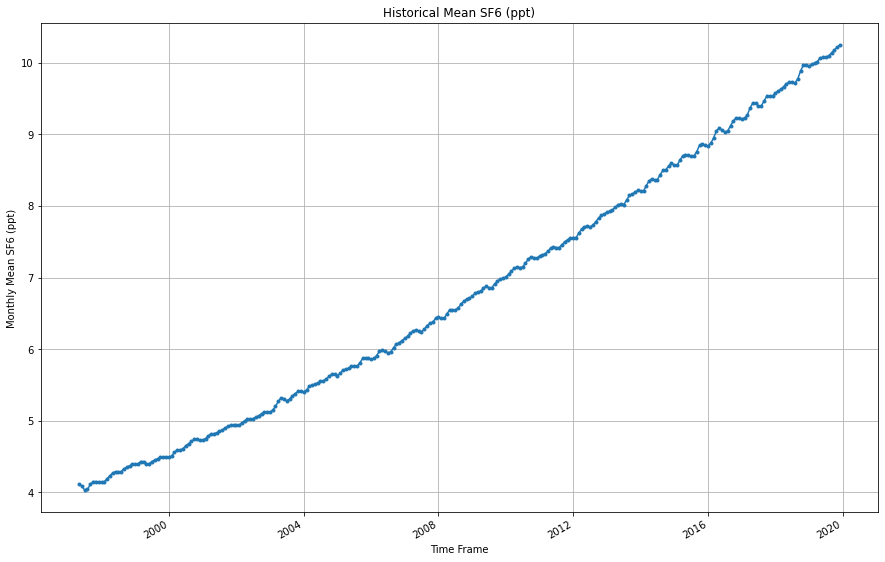

In [8]:
plot = mlo_df['sf6_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean SF6 (ppt)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean SF6 (ppt)')

Text(0, 0.5, 'Monthly Mean Temp.(degC)')

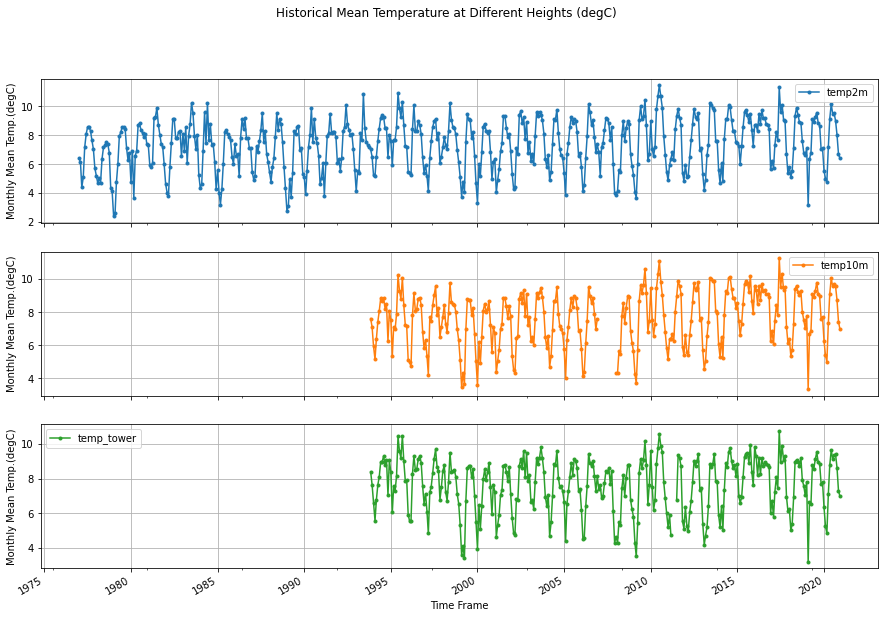

In [9]:
# plot_time_df(mlo_df, ['temp2m', 'temp10m', 'temp_tower'], x_label='Time Frame', y_label='Monthly Mean Temp.(degC)', title='Historical Mean Temperature')
plot = mlo_df.plot(y=['temp2m', 'temp10m', 'temp_tower'], subplots=True, figsize=plot_size, marker='.', title='Historical Mean Temperature at Different Heights (degC)', grid=True)
plot[-1].set_xlabel('Time Frame')
plot[0].set_ylabel('Monthly Mean Temp.(degC)')
plot[1].set_ylabel('Monthly Mean Temp.(degC)')
plot[2].set_ylabel('Monthly Mean Temp.(degC)')

---

#### Concerns that need to be Addressed:

From the current dataset, it is apparent that the mean atmospheric data do not all have the same units. An initial conversion to parts per billion will be made so all of the atmospheric data can share a common unit.

Another concern frorm this dataset that there are many missing values very early on within the dataset. Data for CH<sub>4</sub>, N<sub>2</sub>O, and SF<sub>6</sub> are missing up until June 1997. Additionally, there is a gap in the measured CO<sub>2</sub> data between 1970 and 1976. There are many ways in which these issues could be addressed.

For the missing values, those datapoints can either be pruned or populated with a column mean as a placeholder of an estimate as to what those missing values could be. Another approach would be to backfill an observation into missing values.

A final approach that may possibly be explored is to estimate missing values by running the dataset through the model in reverse to see if the model is able to forecast estimated values for those missing values. Running this estimated dataset through the model in the forwards direction can may then act as a benchmark for the initial run of the model.

The final concern is that there is no atmospheric data for the year of 2020.

**Note to self:** 
Research sklearn imputers later. At a glance, they seem to provide the best means of imputing data.

##### Solutions to the Concerns:

As the many different solutions to the conerns that have already been mentioned, it is a matter of picking a solution and engineering it to work in the favor of the data.

To address this issue of the gap in CO<sub>2</sub> data, the data points before 1976 will be pruned for the sake of consistency.

For the case of missing data, November 1993 is a relatively good starting point for the subset of data that will eventually be used for training and testing the model. Most of the values from November 1993 and onward are populated, but some values such as mean monthly N<sub>2</sub>O and SF<sub>6</sub> are still missing. N<sub>2</sub>O and SF<sub>6</sub> have values starting at May 1997. This gives a 4 year gap where no measurments are known for these two greehouse gasses. As such, the approach that will be taken is backfilling the 4 years of unseen measutments with the first known recorded value.

To address the missing values for the year 2020, that year will be pruned from the dataset since there is not much that can be reconciled from it.

### Constructing the Final Dataset:

To start off, the following code will address the concerns mentioned and demonstrate a before and after of the data once the concerns are addressed.

**Relevant Conversions:**

- 1000 ppm = 1 ppb
- 1000 ppb = 1 ppt
- CO<sub>2</sub> is in ppm -> convert to ppb.
- SF<sub>6</sub> is in ppt -> convert to ppb.

In [10]:
mlo_final_df = mlo_df['1993':'2019'].copy() # Use the range of data that is most relevant.
mlo_final_df['co2_mean'] = mlo_final_df['co2_mean'] / 1000       # Convert CO2 to ppb
mlo_final_df['sf6_mean'] = mlo_final_df['sf6_mean'] * 1000       # Convert SF6 to ppb
mlo_final_df

,site,year,month,co2_mean,ch4_mean,n2o_mean,sf6_mean,wind_direction,wind_speed,wind_steadiness,pressure,temp2m,temp10m,temp_tower,rel_humidity,precipitation_intensity
1993-01-01,MLO,1993,1,0.35692,1747.88,NaN,NaN,227.690958,7.326075,98.681452,677.433558,4.134688,NaN,NaN,31.071527,0.170929
1993-02-01,MLO,1993,2,0.35751,1745.80,NaN,NaN,216.335320,5.885119,99.188988,679.212946,5.522754,NaN,NaN,18.883234,0.000000
1993-03-01,MLO,1993,3,0.35836,1747.90,NaN,NaN,192.116059,4.766801,98.241935,680.381292,5.394467,NaN,NaN,31.823358,0.000000
1993-04-01,MLO,1993,4,0.35967,1746.74,NaN,NaN,150.775140,3.906667,97.577778,681.669583,8.164838,NaN,NaN,22.392550,0.000000
1993-05-01,MLO,1993,5,0.36059,1749.71,NaN,NaN,184.913747,4.784677,98.827957,680.822715,7.647139,NaN,NaN,25.604366,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,MLO,2019,8,0.40975,1861.10,332.50,10100.0,155.077957,4.688172,92.692204,681.696694,9.566801,9.786425,9.521505,50.756720,0.134409
2019-09-01,MLO,2019,9,0.40874,1872.02,332.58,10140.0,162.465278,3.820694,91.937500,681.214194,8.814028,9.085139,8.932639,59.704167,0.080556
2019-10-01,MLO,2019,10,0.40893,1885.47,332.66,10180.0,161.934140,4.763844,94.181452,680.247513,8.664785,8.962500,8.854167,41.229839,0.043011
2019-11-01,MLO,2019,11,0.41031,1894.10,332.82,10220.0,194.230556,4.035139,92.550000,679.991194,7.015833,7.569167,7.685278,50.347222,0.040278


---

Now the all datapoints have a unifying unit of ppb. The next issue to address is the missing values. Choosing a time range between 1993 and 2019 leaves relatively few missing data measurements compared to the entire dataset. Data imputation is a rather complex topic in it of itself, and there are many approaches that can be taken to impute missing data, but to keep the process simple, the missing data measurements will just be backfilled from the first known data point.

This wont provide the best results, but it will give a relative baseline for how the process and data engineering can be improved once the model that is constructed provides results. The plots are replotted to demonstrate the visible changes in the data.


In [11]:
mlo_final_df.fillna(method='backfill', inplace=True)
mlo_final_df

,site,year,month,co2_mean,ch4_mean,n2o_mean,sf6_mean,wind_direction,wind_speed,wind_steadiness,pressure,temp2m,temp10m,temp_tower,rel_humidity,precipitation_intensity
1993-01-01,MLO,1993,1,0.35692,1747.88,313.05,4110.0,227.690958,7.326075,98.681452,677.433558,4.134688,7.611400,8.399601,31.071527,0.170929
1993-02-01,MLO,1993,2,0.35751,1745.80,313.05,4110.0,216.335320,5.885119,99.188988,679.212946,5.522754,7.611400,8.399601,18.883234,0.000000
1993-03-01,MLO,1993,3,0.35836,1747.90,313.05,4110.0,192.116059,4.766801,98.241935,680.381292,5.394467,7.611400,8.399601,31.823358,0.000000
1993-04-01,MLO,1993,4,0.35967,1746.74,313.05,4110.0,150.775140,3.906667,97.577778,681.669583,8.164838,7.611400,8.399601,22.392550,0.000000
1993-05-01,MLO,1993,5,0.36059,1749.71,313.05,4110.0,184.913747,4.784677,98.827957,680.822715,7.647139,7.611400,8.399601,25.604366,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,MLO,2019,8,0.40975,1861.10,332.50,10100.0,155.077957,4.688172,92.692204,681.696694,9.566801,9.786425,9.521505,50.756720,0.134409
2019-09-01,MLO,2019,9,0.40874,1872.02,332.58,10140.0,162.465278,3.820694,91.937500,681.214194,8.814028,9.085139,8.932639,59.704167,0.080556
2019-10-01,MLO,2019,10,0.40893,1885.47,332.66,10180.0,161.934140,4.763844,94.181452,680.247513,8.664785,8.962500,8.854167,41.229839,0.043011
2019-11-01,MLO,2019,11,0.41031,1894.10,332.82,10220.0,194.230556,4.035139,92.550000,679.991194,7.015833,7.569167,7.685278,50.347222,0.040278


---
### CO<sub>2</sub> Scaled Up to PPB:

Text(0, 0.5, 'Monthly Mean CO2 (ppb)')

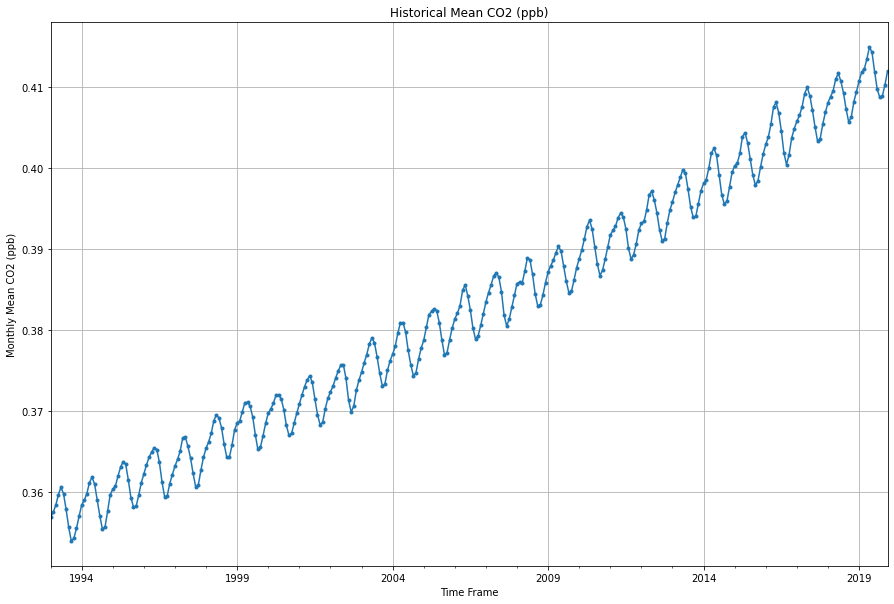

In [12]:
plot = mlo_final_df['co2_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean CO2 (ppb)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean CO2 (ppb)')

---
### N<sub>2</sub>O Backfilled:

Text(0, 0.5, 'Monthly Mean N2O (ppb)')

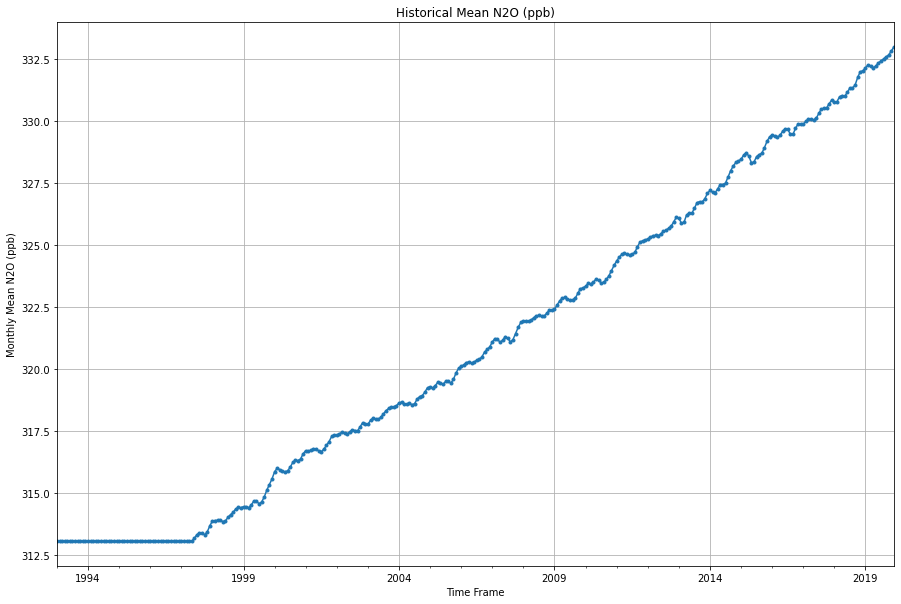

In [13]:
plot = mlo_final_df['n2o_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean N2O (ppb)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean N2O (ppb)')

---
### SF<sub>6</sub> Scaled Down to PPB & Backfilled:

Text(0, 0.5, 'Monthly Mean SF6 (ppb)')

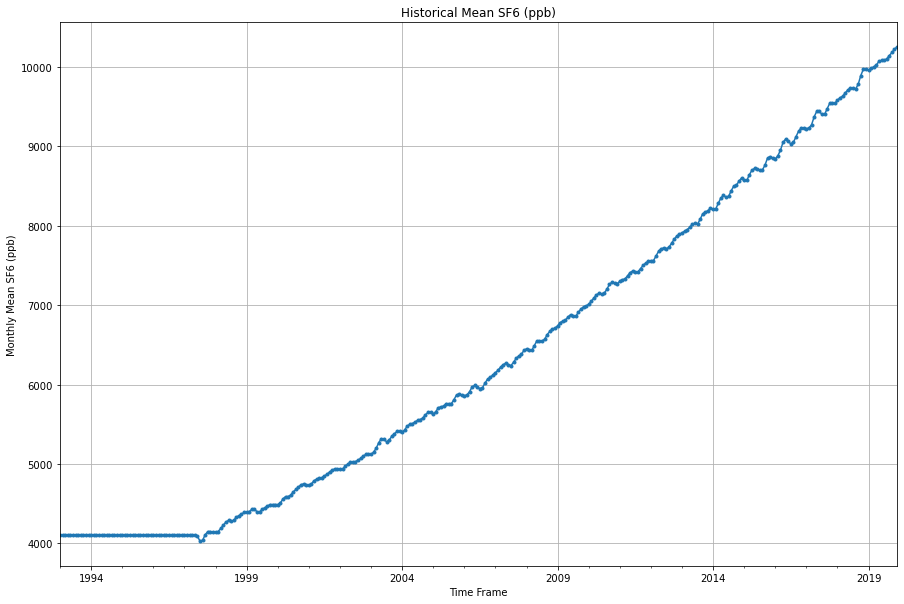

In [14]:
plot = mlo_final_df['sf6_mean'].plot(figsize=plot_size, marker='.', title='Historical Mean SF6 (ppb)', grid=True)
plot.set_xlabel('Time Frame')
plot.set_ylabel('Monthly Mean SF6 (ppb)')

---
### Snapshot of 1993 to 2000:

Text(0, 0.5, 'Mean Temperature at top of tower (degC)')

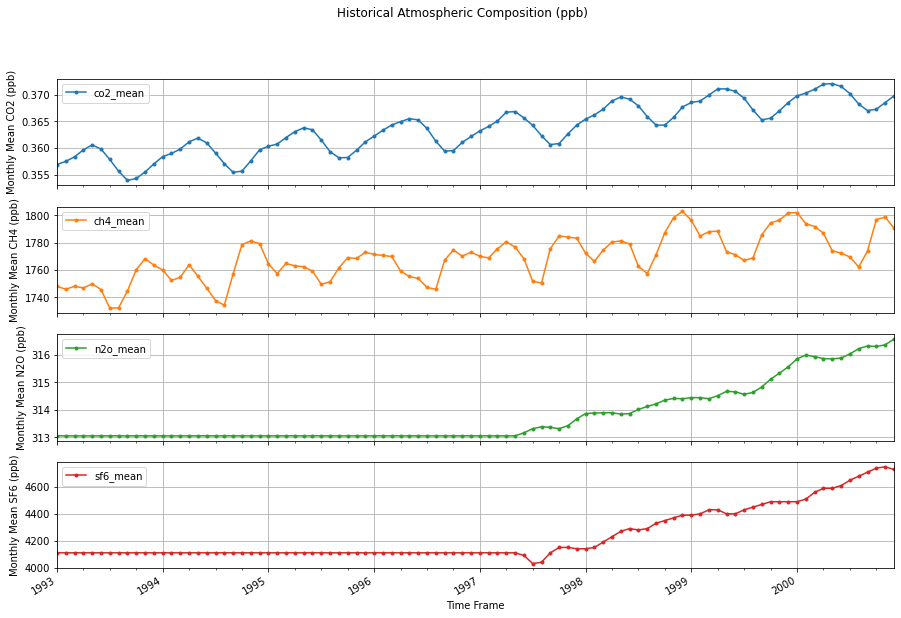

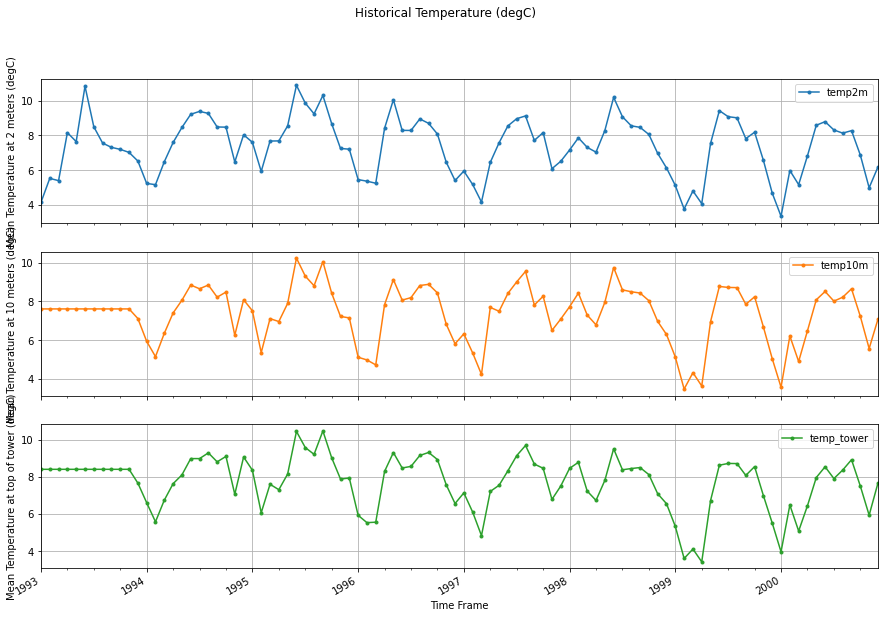

In [15]:
plot = mlo_final_df['1993':'2000'].plot(y=['co2_mean', 'ch4_mean', 'n2o_mean', 'sf6_mean'], subplots=True, figsize=plot_size, marker='.', title='Historical Atmospheric Composition (ppb)', grid=True)
plot[-1].set_xlabel('Time Frame')
plot[0].set_ylabel('Monthly Mean CO2 (ppb)')
plot[1].set_ylabel('Monthly Mean CH4 (ppb)')
plot[2].set_ylabel('Monthly Mean N2O (ppb)')
plot[3].set_ylabel('Monthly Mean SF6 (ppb)')

plot = mlo_final_df['1993':'2000'].plot(y=['temp2m', 'temp10m', 'temp_tower'], subplots=True, figsize=plot_size, marker='.', title='Historical Temperature (degC)', grid=True)
plot[-1].set_xlabel('Time Frame')
plot[0].set_ylabel('Mean Temperature at 2 meters (degC)')
plot[1].set_ylabel('Mean Temperature at 10 meters (degC)')
plot[2].set_ylabel('Mean Temperature at top of tower (degC)')

As demonstrated by the above plots, back filling creates a flat line where there use to be missing values. It is very important to stress that this is not optimal, but will provide a baseline for future refinement.

---

## Time Series Construction & Model Data Splitting:

Now that the full dataset is constructed, it is now time to convert that data into a time series dataset that can be used for the Machine Learning model. While the final dataset is now constructed, exploration of different formats for the dataset should be considered so that different fits can be compared against each other to see which fit more accurately forecasts the data.

Three time series datasets will be explored. One time series will be constructed to include the individual greenhouse gasses as X features and the temperatures at different altitudes to be the Y labels. The second time series will be constructed where the only X feature is the gwp 20-year ppb total equivalence of all the gasses and the Y label is just the mean temperature across the different altitudes. The third and final time series will be the same as the last time series except the X feature will be the gtp 20-year ppb total equivalence of all the gasses.

### Greenhouse Gas Initial Dataset:

Although all of the features of this dataset will only include the individual gasses, it may be beneficial in the future to include the other meteorological features as X features.

e.g. 
- **X Features** = [co2_mean, ch4_mean, n2o_mean, sf6_mean, wind_direction, wind_speed, pressure, rel_humidity, precipitation_intensity]
- **Y Label**    = [temp2m, temp10m, temp_tower]
     
For the time being, and to keep the data simple, the following will be the X Features and Y Labels:

- **X Features** = [co2_mean, ch4_mean, n2o_mean, sf6_mean]
- **Y Label**    = [temp2m, temp10m, temp_tower]

In [16]:
ghg_df = mlo_final_df[['co2_mean', 'ch4_mean', 'n2o_mean', 'sf6_mean', 'temp2m', 'temp10m', 'temp_tower']].copy()
ghg_df.index = mlo_final_df.index
ghg_df

,co2_mean,ch4_mean,n2o_mean,sf6_mean,temp2m,temp10m,temp_tower
1993-01-01,0.35692,1747.88,313.05,4110.0,4.134688,7.611400,8.399601
1993-02-01,0.35751,1745.80,313.05,4110.0,5.522754,7.611400,8.399601
1993-03-01,0.35836,1747.90,313.05,4110.0,5.394467,7.611400,8.399601
1993-04-01,0.35967,1746.74,313.05,4110.0,8.164838,7.611400,8.399601
1993-05-01,0.36059,1749.71,313.05,4110.0,7.647139,7.611400,8.399601
...,...,...,...,...,...,...,...
2019-08-01,0.40975,1861.10,332.50,10100.0,9.566801,9.786425,9.521505
2019-09-01,0.40874,1872.02,332.58,10140.0,8.814028,9.085139,8.932639
2019-10-01,0.40893,1885.47,332.66,10180.0,8.664785,8.962500,8.854167
2019-11-01,0.41031,1894.10,332.82,10220.0,7.015833,7.569167,7.685278


---

### GWP & GTP Datasets:

Now `gwp_df` and `gtp_df` will be constructed. For the time being, only the gwp20 and gtp20 without climate feedback datasets are constructed. Future exploration into 100 year gwp and gtp along with climate feedback can be made. Refer to the gwp & gtp table in the introduction of this notebook.


In [17]:
avg_altitude_temp = ghg_df[['temp2m', 'temp10m', 'temp_tower']].mean(axis=1).copy()
gwp20_co2e = ghg_df[['co2_mean', 'ch4_mean', 'n2o_mean', 'sf6_mean']].mul(gwp20_no_feedback, axis=1).sum(axis=1)
gtp20_co2e = ghg_df[['co2_mean', 'ch4_mean', 'n2o_mean', 'sf6_mean']].mul(gtp20_no_feedback, axis=1).sum(axis=1)

gwp20_df = pd.DataFrame()
gwp20_df['co2e_ppb'] = gwp20_co2e
gwp20_df['avg_altitude_temp'] = avg_altitude_temp
gwp20_df.index = ghg_df.index

gtp20_df = pd.DataFrame()
gtp20_df['co2e_ppb'] = gtp20_co2e
gtp20_df['avg_altitude_temp'] = avg_altitude_temp

In [18]:
gwp20_df

,co2e_ppb,avg_altitude_temp
1993-01-01,7.215447e+07,6.715230
1993-02-01,7.215429e+07,7.177918
1993-03-01,7.215447e+07,7.135156
1993-04-01,7.215437e+07,8.058613
1993-05-01,7.215462e+07,7.886047
...,...,...
2019-08-01,1.769941e+08,9.624910
2019-09-01,1.776951e+08,8.943935
2019-10-01,1.783962e+08,8.827151
2019-11-01,1.790970e+08,7.423426


In [19]:
gtp20_df

,co2e_ppb,avg_altitude_temp
1993-01-01,7.437028e+08,6.715230
1993-02-01,7.437027e+08,7.177918
1993-03-01,7.437028e+08,7.135156
1993-04-01,7.437027e+08,8.058613
1993-05-01,7.437029e+08,7.886047
...,...,...
2019-08-01,1.827307e+09,9.624910
2019-09-01,1.834544e+09,8.943935
2019-10-01,1.841780e+09,8.827151
2019-11-01,1.849017e+09,7.423426


---

#### Overall Historical CO<sub>2</sub>e:

The following graph demonstrates the total CO<sub>2</sub>e for each month over the time frame of the entire dataset.

Text(0, 0.5, 'Monthly Mean CO2e (gwp20 ppb)')

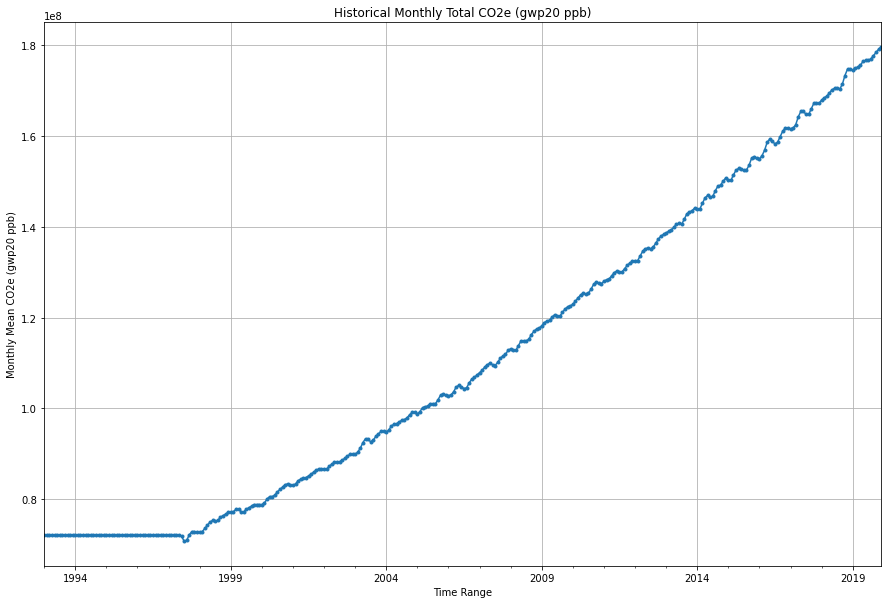

In [20]:
plot = gwp20_df['co2e_ppb'].plot(figsize=plot_size, marker='.', title='Historical Monthly Total CO2e (gwp20 ppb)', grid=True)
plot.set_xlabel('Time Range')
plot.set_ylabel('Monthly Mean CO2e (gwp20 ppb)')

#### 1993 to 2000 CO<sub>2</sub>e:

The following graph demonstrates the total CO<sub>2</sub>e for each month between 1993 and 2000.

Text(0, 0.5, 'Monthly Mean CO2e (gwp20 ppb)')

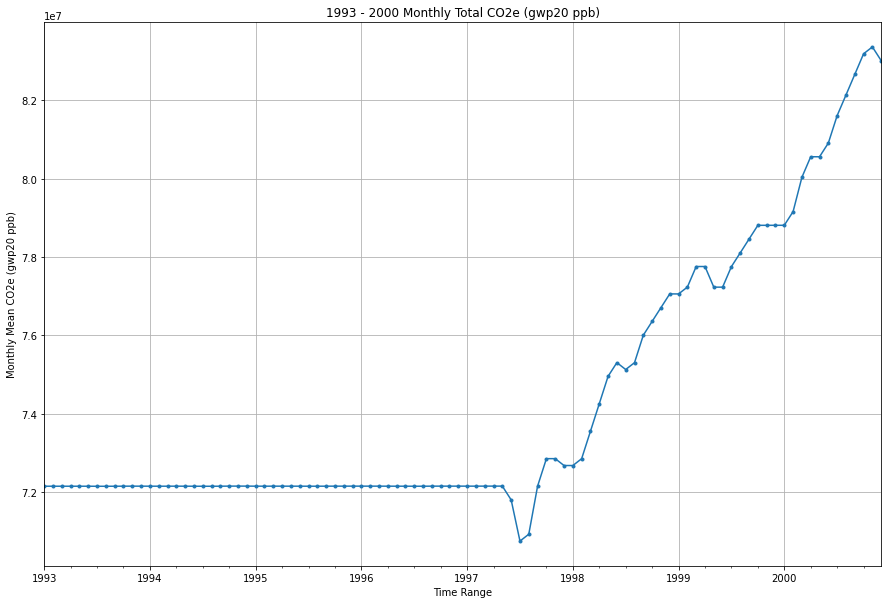

In [21]:
plot = gwp20_df['1993':'2000']['co2e_ppb'].plot(figsize=plot_size, marker='.', title='1993 - 2000 Monthly Total CO2e (gwp20 ppb)', grid=True)
plot.set_xlabel('Time Range')
plot.set_ylabel('Monthly Mean CO2e (gwp20 ppb)')

#### 2012 to 2019 CO<sub>2</sub>e:

The following graph demonstrates the total CO<sub>2</sub>e for each month between 2012 and 2019.

Text(0, 0.5, 'Monthly Mean CO2e (gwp20 ppb)')

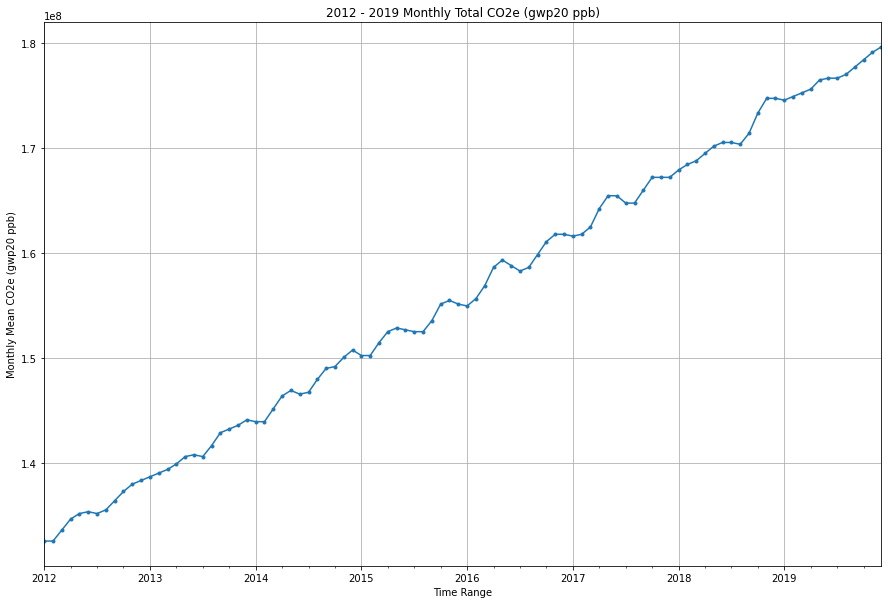

In [22]:
plot = gwp20_df['2012':'2019']['co2e_ppb'].plot(figsize=plot_size, marker='.', title='2012 - 2019 Monthly Total CO2e (gwp20 ppb)', grid=True)
plot.set_xlabel('Time Range')
plot.set_ylabel('Monthly Mean CO2e (gwp20 ppb)')

#### Overall Historical Temperature Averaged Over Altitude:

The following graph demonstrates the temperature for each month averaged over the altitude of measurements over the time frame of the entire dataset.

Text(0, 0.5, 'Mean Temperature (degC)')

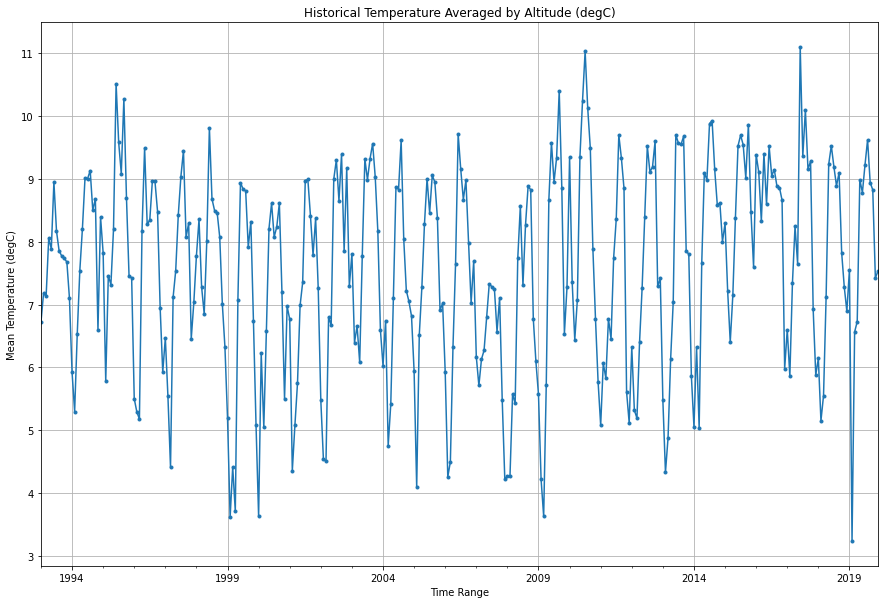

In [23]:
plot = gwp20_df['avg_altitude_temp'].plot(figsize=plot_size, marker='.', title='Historical Temperature Averaged by Altitude (degC)', grid=True)
plot.set_xlabel('Time Range')
plot.set_ylabel('Mean Temperature (degC)')

#### 1993 to 2000 Temperature Averaged Over Altitude:

The following graph demonstrates the temperature for each month averaged over the altitude of measurements for each month between 1993 and 2000.

Text(0, 0.5, 'Mean Temperature (degC)')

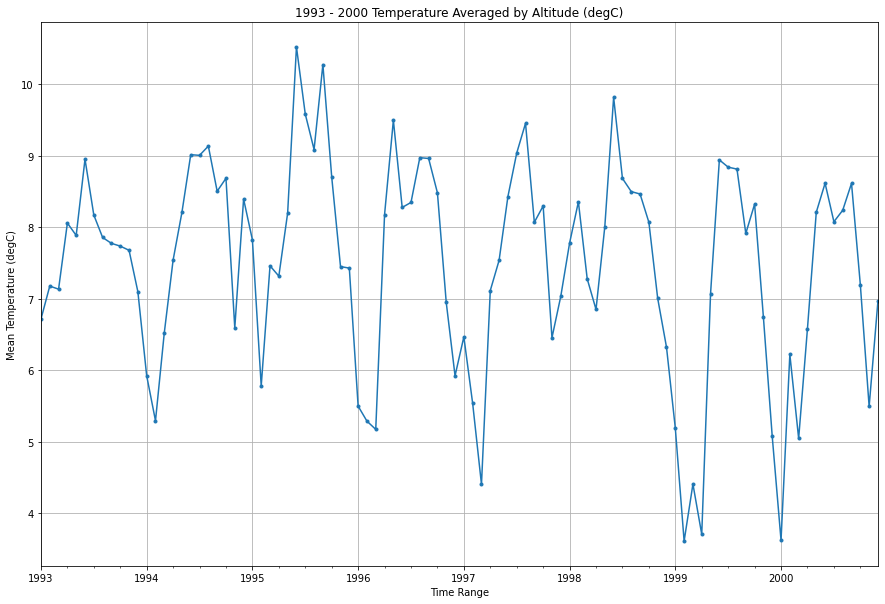

In [24]:
plot = gwp20_df['1993':'2000']['avg_altitude_temp'].plot(figsize=plot_size, marker='.', title='1993 - 2000 Temperature Averaged by Altitude (degC)', grid=True)
plot.set_xlabel('Time Range')
plot.set_ylabel('Mean Temperature (degC)')

---

### Feature Normalization and Train & Test Splits:

With splitting the data among training and testing sets, it is important to make sure the temporal qualities of the data are conserved. This means that normal Cross-Validation and random sampling cannot be applied to time series data. The two methods of splitting time series data is at a discrete moment in time, or time series cross-validation splitting. For time series cross validation, one can use `TimeSeriesSplit` provided by `sklearn`. For the moment, a discrit split will be made instead of using sklearn's TimeSeriesSplit.

In [25]:
def scale_and_split(df, split=0.8):
    split_at = int(len(df) * split)
    scaler = MinMaxScaler()
    scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    scaled.index = df.index
    return scaler, scaled.iloc[:split_at], scaled.iloc[split_at:]

def train_test_sets(train_df, test_df, x_feature_cols=[], y_label_cols=[]):
    return train_df[x_feature_cols], train_df[y_label_cols], test_df[x_feature_cols], test_df[y_label_cols]

#### Greenhouse Gas Test & Train Splits:
---

In [26]:
ghg_scaler, ghg_train, ghg_test = scale_and_split(ghg_df)
ghg_X_train, ghg_Y_train, ghg_X_test, ghg_Y_test = train_test_sets(ghg_train, ghg_test, ['co2_mean', 'ch4_mean', 'n2o_mean', 'sf6_mean'], ['temp2m', 'temp10m', 'temp_tower'])

##### Greenhouse Gas Train Split:

In [27]:
ghg_train

,co2_mean,ch4_mean,n2o_mean,sf6_mean,temp2m,temp10m,temp_tower
1993-01-01,0.048665,0.094913,0.000000,0.012862,0.119299,0.538495,0.688804
1993-02-01,0.058332,0.082551,0.000000,0.012862,0.286484,0.538495,0.688804
1993-03-01,0.072260,0.095031,0.000000,0.012862,0.271033,0.538495,0.688804
1993-04-01,0.093724,0.088137,0.000000,0.012862,0.604709,0.538495,0.688804
1993-05-01,0.108799,0.105789,0.000000,0.012862,0.542355,0.538495,0.688804
...,...,...,...,...,...,...,...
2014-03-01,0.754219,0.683763,0.704967,0.683280,0.206588,0.235019,0.242179
2014-04-01,0.785024,0.734696,0.712995,0.694534,0.556383,0.566213,0.552423
2014-05-01,0.794691,0.667835,0.721525,0.699357,0.719803,0.749220,0.754689
2014-06-01,0.780764,0.591466,0.721525,0.696141,0.721258,0.736202,0.722666


##### Greenhouse Gas Test Split:

In [28]:
ghg_test

,co2_mean,ch4_mean,n2o_mean,sf6_mean,temp2m,temp10m,temp_tower
2014-08-01,0.701131,0.549447,0.737080,0.709003,0.815524,0.857391,0.866794
2014-09-01,0.681796,0.648104,0.749624,0.718650,0.710134,0.764975,0.770117
2014-10-01,0.687203,0.666469,0.759157,0.720257,0.622283,0.697322,0.714245
2014-11-01,0.717352,0.730655,0.766182,0.728296,0.615665,0.692468,0.737567
2014-12-01,0.746190,0.783846,0.769192,0.734727,0.532002,0.621735,0.658975
...,...,...,...,...,...,...,...
2019-08-01,0.914304,0.767800,0.975916,0.975884,0.773568,0.813757,0.837310
2019-09-01,0.897755,0.832699,0.979930,0.982315,0.682900,0.725005,0.759362
2019-10-01,0.900868,0.912635,0.983944,0.988746,0.664925,0.709484,0.748975
2019-11-01,0.923480,0.963925,0.991972,0.995177,0.466317,0.533150,0.594249


#### CO<sub>2</sub>e GWP20 Train & Test Splits:
---

In [29]:
gwp20_scaler, gwp20_train, gwp20_test = scale_and_split(gwp20_df)
gwp20_X_train, gwp20_Y_train, gwp20_X_test, gwp20_Y_test = train_test_sets(gwp20_train, gwp20_test, 'co2e_ppb', 'avg_altitude_temp')

##### GWP20 Train Split:

In [30]:
gwp20_train

,co2e_ppb,avg_altitude_temp
1993-01-01,0.012856,0.442447
1993-02-01,0.012855,0.501222
1993-03-01,0.012856,0.495790
1993-04-01,0.012855,0.613096
1993-05-01,0.012858,0.591175
...,...,...
2014-03-01,0.683276,0.228729
2014-04-01,0.694535,0.561755
2014-05-01,0.699349,0.745139
2014-06-01,0.696124,0.731051


##### GWP20 Test Split:

In [31]:
gwp20_test

,co2e_ppb,avg_altitude_temp
2014-08-01,0.708979,0.850843
2014-09-01,0.718637,0.751946
2014-10-01,0.720248,0.680554
2014-11-01,0.728294,0.684063
2014-12-01,0.734731,0.605845
...,...,...
2019-08-01,0.975857,0.812062
2019-09-01,0.982295,0.725558
2019-10-01,0.988736,0.710723
2019-11-01,0.995173,0.532409


#### CO<sub>2</sub>e GTP20 Train & Test Splits:
---

In [32]:
gtp20_scaler, gtp20_train, gtp20_test = scale_and_split(gtp20_df)
gtp20_X_train, gtp20_Y_train, gtp20_X_test, gtp20_Y_test = train_test_sets(gtp20_train, gtp20_test, 'co2e_ppb', 'avg_altitude_temp')

##### GTP20 Train Split:

In [33]:
gtp20_train

,co2e_ppb,avg_altitude_temp
1993-01-01,0.012861,0.442447
1993-02-01,0.012861,0.501222
1993-03-01,0.012861,0.495790
1993-04-01,0.012861,0.613096
1993-05-01,0.012861,0.591175
...,...,...
2014-03-01,0.683279,0.228729
2014-04-01,0.694534,0.561755
2014-05-01,0.699356,0.745139
2014-06-01,0.696140,0.731051


##### GTP20 Test Split:

In [34]:
gtp20_test

,co2e_ppb,avg_altitude_temp
2014-08-01,0.709001,0.850843
2014-09-01,0.718649,0.751946
2014-10-01,0.720257,0.680554
2014-11-01,0.728296,0.684063
2014-12-01,0.734727,0.605845
...,...,...
2019-08-01,0.975882,0.812062
2019-09-01,0.982314,0.725558
2019-10-01,0.988745,0.710723
2019-11-01,0.995177,0.532409


---

### Time Series Construction:

Time series construction starts to open up into more tangible territories for going from raw data to a Machine Learning model. In the prior section, the data was split into training and test sets for their respective datasets. Converting those splits into time series data is where the data goes from being raw time series data to labeled time series data that is digestible by a Machine Learning model. The features for both training and testing sets are paired to a lable at some point in the 'future'. This time step in the 'future' acts as the expected outcome for the machine learning model. Additionally, this introduces a time lag component to the model. Using different time lags may correlate better to single instances having effects that are not seen until either near or far future. Tweaking this parameter requires further research.

To note, since this is time series data, the labels are allowed to be resused as X features since those labels being used as X features will reference different labels in the future. This is what is known as the Sliding Window algorithm. The Sliding Window algorithm is very versitile and useful. Since Y labels are reused as X features, having X features refer to future X features can be a means of forecasting that feature.

If the Y labels and X features do not intersect, then those X features are referring to a parallel time series. If this is the case, the Y labels are not recycled into X features.

e.g. Consider the two parallel series:
- [1, 2, 3, 4, 5]
- [a, b, c, d, e]

If the time lag is 1 and the window width is 2, then the following maps series 1 to series 2.
- 1 -> b, 2 -> c
- 2 -> c, 3 -> d
- 3 -> d, 4 -> e

If we consider just the first series, then the following maps series 1 to series 1.
- 1 -> 2, 2 -> 3
- 2 -> 3, 3 -> 4
- 3 -> 4, 4 -> 5

In [35]:
def timestamped_univariate_timeseries(data, n_steps):
    """
    Returns a univariate timeseries.
    :data: A Pandas DataFrame column.
    :n_steps: The number window width for prediction.
    :returns: Returns the X features to input into a model.
    Also returns a Pandas DataFrame containing the Y labels
    indexed at their appropriate timestamp.
    """
    x, y, timestamps = [], [], []
    for i in range(len(data)):
        end = i + n_steps
        if end > len(data) - 1:
            break
        add_x, add_y, add_timestamp = data.iloc[i:end], data.iloc[end], data.index[end]
        x.append(add_x)
        y.append(add_y)
        timestamps.append(add_timestamp)
    x = np.array(x)
    x = x.reshape((x.shape[0], x.shape[1], 1))
    y_labels = pd.DataFrame(np.array(y), columns=['y'])
    y_labels.index = timestamps
    return x, y_labels

---
#### Inidvidual Gasses to Temperature Time Series:

The first type of model to be made will attempt to forecast temperatures at different altitudes from greenhouse gas data. The following are the time series splits created to map these two parallel datasets to each other, and frame them as a supervised learning appraoch.

In [36]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

# These are hyper-parameters that can be tweaked.
ghg_timelag = 1           # Currently tuned to 1 month in the future 
                          # Equivalent to the number of timesteps that will label a given Xi. e.g. how many Y points to skip over after an iteration. aka: offset
ghg_stride = 1            # Currently goes month by month from one iteration to the next.
                          # Equivalent to how many timesteps forward the X set will be moved. e.g. how many X points to skip over after an iteration.
ghg_batchsize = 24        # Current window width of 24 time steps. i.e. 24 months
                          # Corresponds to the window width. e.g. If the batch size is 12, then 12 X features are mapped to 12 Y labels at i+timelag for each iteration i.

# Todo: Fix this up - will be implementing on time series algorithm.    

ghg_train_timeseries = timeseries_dataset_from_array(ghg_X_train.to_numpy(), ghg_Y_train.to_numpy(), ghg_timelag, sequence_stride=ghg_stride, batch_size=ghg_batchsize)
ghg_test_timeseries = timeseries_dataset_from_array(ghg_X_test.to_numpy(), ghg_Y_test.to_numpy(), ghg_timelag, sequence_stride=ghg_stride, batch_size=ghg_batchsize)

#### Individual Gasses to Individual Gasses Time Series:

Four other models will be created: one for each individual greenhouse gas. These time series splits map back to themselves but as future Y labels. These models hope to forecast the individual gasses well off into the future.

In [37]:
co2_train_x, co2_train_y = timestamped_univariate_timeseries(ghg_X_train['co2_mean'], 3)
co2_test_x, co2_test_y = timestamped_univariate_timeseries(ghg_X_test['co2_mean'], 3)

# gas_timelag = 3           # Currently tuned to 12 month in the future 
#                           # Equivalent to the number of timesteps that will label a given Xi. e.g. how many Y points to skip over after an iteration. aka: offset
# gas_stride = 1            # Currently goes month by month from one iteration to the next.
#                           # Equivalent to how many timesteps forward the X set will be moved. e.g. how many X points to skip over after an iteration.
# gas_batchsize = 1         # Current window width of 1 time steps. i.e. 1 months
#                           # Corresponds to the window width. e.g. If the batch size is 12, then 12 X features are mapped to 12 Y labels at i+timelag for each iteration i.

# co2_train_timeseries = timeseries_dataset_from_array(ghg_X_train['co2_mean'].to_numpy(), ghg_X_train['co2_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)
# co2_test_timeseries = timeseries_dataset_from_array(ghg_X_test['co2_mean'].to_numpy(), ghg_X_test['co2_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)

# ch4_train_timeseries = timeseries_dataset_from_array(ghg_X_train['ch4_mean'].to_numpy(), ghg_X_train['ch4_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)
# ch4_test_timeseries = timeseries_dataset_from_array(ghg_X_test['ch4_mean'].to_numpy(), ghg_X_test['ch4_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)

# n2o_train_timeseries = timeseries_dataset_from_array(ghg_X_train['n2o_mean'].to_numpy(), ghg_X_train['n2o_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)
# n2o_test_timeseries = timeseries_dataset_from_array(ghg_X_test['n2o_mean'].to_numpy(), ghg_X_test['n2o_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)

# sf6_train_timeseries = timeseries_dataset_from_array(ghg_X_train['sf6_mean'].to_numpy(), ghg_X_train['sf6_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)
# sf6_test_timeseries = timeseries_dataset_from_array(ghg_X_test['sf6_mean'].to_numpy(), ghg_X_test['sf6_mean'].to_numpy(), gas_timelag, sequence_stride=gas_stride, batch_size=gas_batchsize)

#### GWP20 CO<sub>2</sub>e to Temperature Averaged Over Altitude Time Series:

The GWP20 time series split will be used for another model that will be made. It will attempt to forecast temperature averaged over altitudes from the total CO<sub>2</sub>e with a GWP for 20-years.

An ideal time lag for this time series would be 240 months, which is 20 years, but unfortunately the data is only goes back 26 years. The 240 month time lag can be attempted, but may not capture the full effect since there simply are not enough data points to be relevant enough. Regardless, there simply are not enough data points to do this. There needs to be at least 40 years worth of data. Granted, the full mlo dataset has that many datapoints, but since there are a lot of missing datapoints, the results from the machine learning model would be unreliable. If the above 5 time series perform well, then as mentioned early on during the data engineering portion, those missing data points may be imputed by running a model through a reversed time axis with the individual greenhouse gas time series and temperature time series. This may be explored in the future in order to provide better results to the GWP20 and GTP20 models. This issue is purly a data issue and not a model issue.

The hope is that a gwp20 CO<sub>2</sub> will provide insight to temperatures being observed at the current time step.

In [38]:
gwp20_timelag = 1        # Currently tuned to 1 month in the future 
                         # Equivalent to the number of timesteps that will label a given Xi. e.g. how many Y points to skip over after an iteration. aka: offset
gwp20_stride = 1         # Currently goes month by month from one iteration to the next.
                         # Equivalent to how many timesteps forward the X set will be moved. e.g. how many X points to skip over after an iteration.
gwp20_batchsize = 1      # Current window width of 24 time steps. i.e. 24 months
                         # Corresponds to the window width. e.g. If the batch size is 12, then 12 X features are mapped to 12 Y labels at i+timelag for each iteration i.

# Todo: Fix this up - will be implementing on time series algorithm.
    
gwp20_train_timeseries = timeseries_dataset_from_array(gwp20_X_train.to_numpy(), gwp20_Y_train.to_numpy(), gwp20_timelag, sequence_stride=gwp20_stride, batch_size=gwp20_batchsize)
gwp20_test_timeseries = timeseries_dataset_from_array(gwp20_X_test.to_numpy(), gwp20_Y_test.to_numpy(), gwp20_timelag, sequence_stride=gwp20_stride, batch_size=gwp20_batchsize)

#### GTP20 CO<sub>2</sub>e Temperature Averaged Over Altitude Time Series:

The GTP20 time series will be used for the last model that will be made. Like the GWP20 time series, it too will attempt to forecast temperature but based from GTP20 conversion factors rather than the GWP20 factors. Like GWP20, the ideal time lag would be 312 months.

In [39]:
gtp20_timelag = 1        # Currently tuned to 1 month in the future 
                         # Equivalent to the number of timesteps that will label a given Xi. e.g. how many Y points to skip over after an iteration. aka: offset
gtp20_stride = 1         # Currently goes month by month from one iteration to the next.
                         # Equivalent to how many timesteps forward the X set will be moved. e.g. how many X points to skip over after an iteration.
gtp20_batchsize = 24      # Current window width of 24 time steps. i.e. 24 months
                         # Corresponds to the window width. e.g. If the batch size is 12, then 12 X features are mapped to 12 Y labels at i+timelag for each iteration i.

# Todo: Fix this up - will be implementing on time series algorithm. 
    
gtp20_train_timeseries = timeseries_dataset_from_array(gtp20_X_train.to_numpy(), gtp20_Y_train.to_numpy(), gtp20_timelag, sequence_stride=gtp20_stride, batch_size=gtp20_batchsize)
gtp20_test_timeseries = timeseries_dataset_from_array(gtp20_X_test.to_numpy(), gtp20_Y_test.to_numpy(), gtp20_timelag, sequence_stride=gtp20_stride, batch_size=gtp20_batchsize)

### Time Series Conclusion:

In total, there are 9 pairs of train and test time series sets. This equates out to 9 different models that will be made from the neural networks that will be constructed in the next section.

To overview, here are the 7 time series sets and what models that will be used for:
1. Greenhouse Gas time series used to forecast the next month's temperatures at 2 meters, 10 meters, and at the top of the measurement towers.
2. CO<sub>2</sub> gas time series used to forecast the next month of CO<sub>2</sub>
3. CH<sub>4</sub> gas time series used to forecast the next month of CH<sub>4</sub>
4. N<sub>2</sub>O gas time series used to forecast the next month of N<sub>2</sub>
5. SF<sub>6</sub> gas time series used to forecast the next month of SF<sub>6</sub>
6. CO<sub>2</sub>e GWP 20 time series used to forecast the next month's temperature averaged over altitude.
8. CO<sub>2</sub>e GTP 20 time series used to forecast the next month's temperature averaged over altitude.

There are then two other potential models that may be explored in the future if model 1 through 5 perform well. If model 1 through 5 performs well, then two models can be made for the reverse time axes to forecast values in the past. This may be explored in the future to better model 6 and 8.

---

## Deep Learning / Machine Learning Approaches:

There are two different Deep Learning/Machine Learning approaches that will be explored. The two approaches are a stand alone recurrent neural network and an LSTNet. These two different models will be constructed then compared against.

### Recurrent Neural Network:


In [40]:
from tensorflow import keras, optimizers, losses, metrics
from tensorflow.keras import layers, Sequential

def view_timeseries(time_series):
    """
    View a slice of the the passed timeseries.
    """
    print(len(time_series))
    for batch in time_series:
        x, y = batch
        print(f'{x} -> {y}\n')

In [41]:
# view_timeseries(co2_train_timeseries)
co2_train_x.shape

(256, 3, 1)

In [42]:
co2_model = Sequential()
# co2_model.add(layers.Reshape(target_shape=(1, 3), dtype='float64'))
co2_model.add(layers.LSTM(50, activation='relu', input_shape=(3, 1)))
co2_model.add(layers.Dense(1))
co2_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'cosine_similarity', 'accuracy'])
history = co2_model.fit(co2_train_x, co2_train_y['y'].to_numpy(), epochs=100, verbose=0).history
co2_model.summary()

co2_train_eval = co2_model.evaluate(co2_train_x, co2_train_y, return_dict=True)
co2_test_eval = co2_model.evaluate(co2_test_x, co2_test_y, return_dict=True)
co2_train_predictions = co2_model.predict(co2_train_x)
co2_test_predictions = co2_model.predict(co2_test_x)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 1ms/step - loss: 0.0015 - mae: 0.0353 - cosine_similarity: 1.0000 - accuracy: 0.0161


In [43]:
def unscale(scaler, data, col, cols):
    dummy = pd.DataFrame(np.zeros((len(data), len(cols))), columns=cols)
    dummy[col] = data
    dummy = pd.DataFrame(scaler.inverse_transform(dummy), columns=cols)
    return dummy[col]

{'loss': 0.0011667945655062795, 'mae': 0.030229900032281876, 'cosine_similarity': 0.99609375, 'accuracy': 0.00390625}


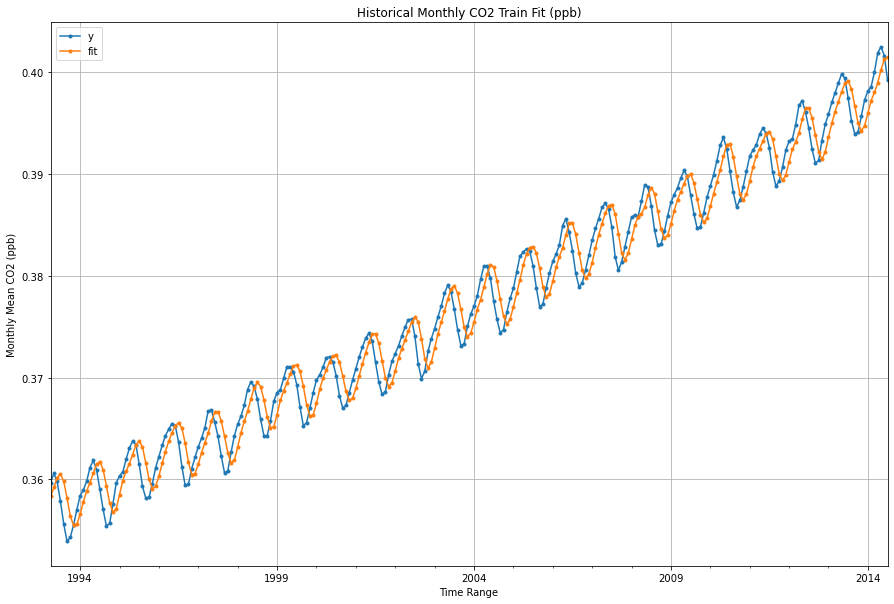

In [44]:
co2_train_fit = co2_train_predictions.flatten()
co2_forecast = unscale(ghg_scaler, co2_train_fit, 'co2_mean', ghg_df.columns)
co2_truth = unscale(ghg_scaler, co2_train_y['y'].to_numpy(), 'co2_mean', ghg_df.columns)
plt_df = pd.DataFrame({ 'y': co2_truth.to_numpy(), 'fit': co2_forecast.to_numpy()}, index=co2_train_y.index)
p = plt_df.plot(figsize=(plot_size), marker='.', title='Historical Monthly CO2 Train Fit (ppb)', grid=True)
p.set_xlabel('Time Range')
p.set_ylabel('Monthly Mean CO2 (ppb)')

print(co2_train_eval)

{'loss': 0.0014786061365157366, 'mae': 0.035296592861413956, 'cosine_similarity': 1.0, 'accuracy': 0.016129031777381897}


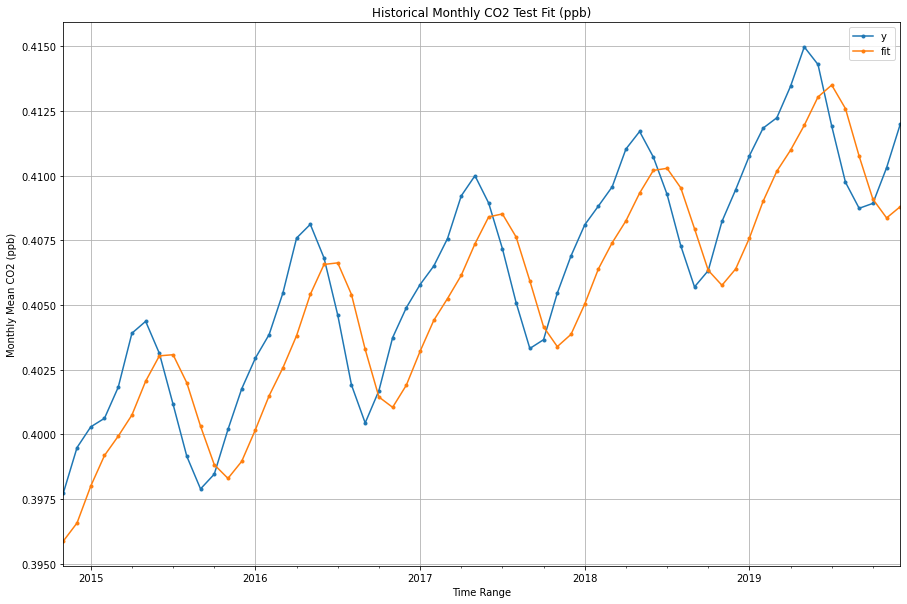

In [45]:
co2_test_fit = co2_test_predictions.flatten()
co2_forecast = unscale(ghg_scaler, co2_test_fit, 'co2_mean', ghg_df.columns)
co2_truth = unscale(ghg_scaler, co2_test_y['y'].to_numpy(), 'co2_mean', ghg_df.columns)
plt_df = pd.DataFrame({ 'y': co2_truth.to_numpy(), 'fit': co2_forecast.to_numpy()}, index=co2_test_y.index)
p = plt_df.plot(figsize=(plot_size), marker='.', title='Historical Monthly CO2 Test Fit (ppb)', grid=True)
p.set_xlabel('Time Range')
p.set_ylabel('Monthly Mean CO2 (ppb)')

print(co2_test_eval)

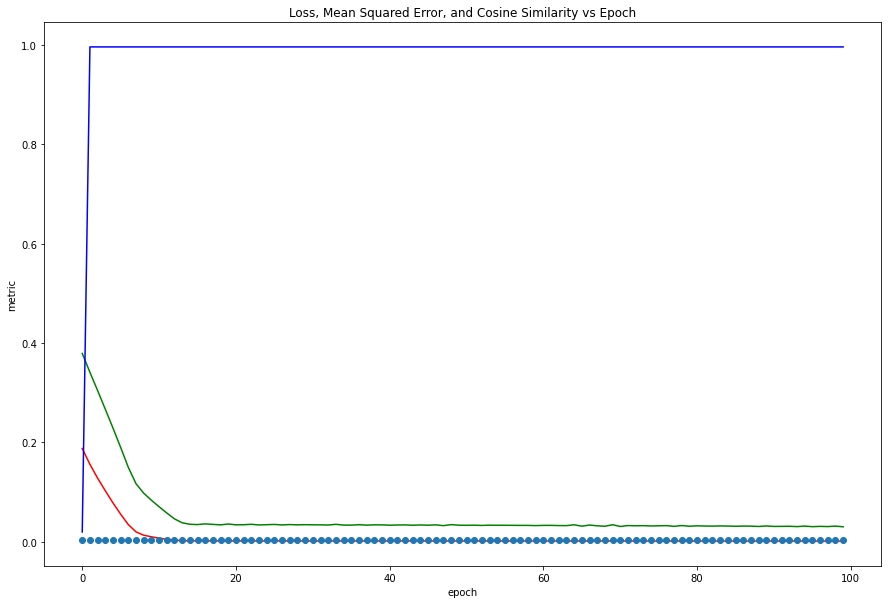

In [46]:
plt.figure(figsize=plot_size)
plt.plot(history['loss'], 'r')
plt.plot(history['mae'], 'g')
plt.plot(history['cosine_similarity'], 'b')
plt.plot(history['accuracy'], 'o')
plt.title('Loss, Mean Squared Error, and Cosine Similarity vs Epoch')
plt.ylabel('metric')
plt.xlabel('epoch')
plt.show()

### LSTNet:

> CNNs mixed in with RNNs and Autoregression / combining statistical approaches and incorperating them into the Machine Learning model.

---

## References:


#### Preliminary Sources:

    [r.1] https://www.ipcc.ch/site/assets/uploads/2018/02/WG1AR5_Chapter08_FINAL.pdf pg. 710
    [r.2] https://ourworldindata.org/greenhouse-gas-emissions
    [r.3] https://github.com/owid/co2-data
    [r.4] https://www.epa.gov/ghgemissions/understanding-global-warming-potentials
    [r.5] https://www.carbonbrief.org/guest-post-a-new-way-to-assess-global-warming-potential-of-short-lived-pollutants
    [r.6] https://www.ghgprotocol.org/sites/default/files/ghgp/Global-Warming-Potential-Values%20%28Feb%2016%202016%29_1.pdf
    [r.7] https://en.wikipedia.org/wiki/Global_warming_potential
    
    
    https://blog.tensorflow.org/2019/03/structural-time-series-modeling-in.html
    https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython
    https://www.youtube.com/watch?v=v5ijNXvlC5A
    https://machinelearningmastery.com/how-to-use-the-timeseriesgenerator-for-time-series-forecasting-in-keras/

## Data Sources:

    [d1] Dlugokencky, E.J., J.W. Mund, A.M. Crotwell, M.J. Crotwell, and K.W. Thoning (2021), Atmospheric Carbon Dioxide Dry Air Mole Fractions from the NOAA GML Carbon Cycle Cooperative Global Air Sampling Network, 1968-2019, Version: 2021-02, https://doi.org/10.15138/wkgj-f215
    
    [d2] Dlugokencky, E.J.,  A.M. Crotwell, J.W. Mund, M.J. Crotwell, and K.W. Thoning (2020), Atmospheric Methane Dry Air Mole Fractions from the NOAA GML Carbon Cycle Cooperative Global Air Sampling Network, 1983-2019, Version: 2020-07, https://doi.org/10.15138/VNCZ-M766
    
    [d3] Dlugokencky, E.J., A.M. Crotwell, J.W. Mund, M.J. Crotwell, and K.W. Thoning (2020), Atmospheric Nitrous Oxide Dry Air Mole Fractions from the NOAA GML Carbon Cycle Cooperative Global Air Sampling Network, 1997-2019, Version: 2020-07, https://doi.org/10.15138/53g1-x417
        
    [d4] Dlugokencky, E.J., A.M. Crotwell, J.W. Mund, M.J. Crotwell, and K.W. Thoning (2020), Atmospheric Sulfur Hexafluoride Dry Air Mole Fractions from the NOAA GML Carbon Cycle Cooperative Global Air Sampling Network, 1997-2019, Version: 2020-07, https://doi.org/10.15138/p646-pa37
        
    [d5] Todo: Insert reference for MLO meterological datasets. 

#### Preliminary Sources:

    [d.1] https://search.earthdata.nasa.gov
    [d.2] https://www.epa.gov/ghgreporting/ghg-reporting-program-data-sets
    [d.3] https://www.esrl.noaa.gov/gmd/dv/data/
    [d.4] https://cait.wri.org/

## Exploratory References:

    [e.1] https://www.oxfordmartin.ox.ac.uk/pollutants/
    [e.2] https://www.carbonbrief.org/guest-post-a-new-way-to-assess-global-warming-potential-of-short-lived-pollutants
    [e.3] https://ghgprotocol.org/about-us
    [e.4] https://timeseriesclassification.com/algorithm.php
    [e.5] https://en.wikipedia.org/wiki/Dynamic_time_warping
    [e.6] https://towardsdatascience.com/time-series-forecasting-with-deep-learning-and-attention-mechanism-2d001fc871fc

## Impromptu Thoughts:

##### Hypotheticals:
> "What if we modeled a NET loss or NET gain?"

> "What if we converted to a short lived gas rather than CO<sub>2</sub>

> "LSTNet? aka use CNNs alongside RNNs. RNN hourly and RNN daily -> basically additional layers to do multiple-time series."

## Todo:

- Check out the mcfly library: https://blog.esciencecenter.nl/mcfly-time-series-classification-made-easy-e47de8d29838?gi=2578869c05b9 
    - Can be helpful for tweaking models and picking the best one.
- Research more on Sklearn's imputer methods:
    - Can be useful to impute a lot of the missing data.
